# Mistral OCR Notebook

---
In this guide, we will demonstrate how to use OCR with Mistral model to discuss any text-based document, whether it's a PDF or photo.

In a second part we will further use the Document understanding to enhance RAG application.

---


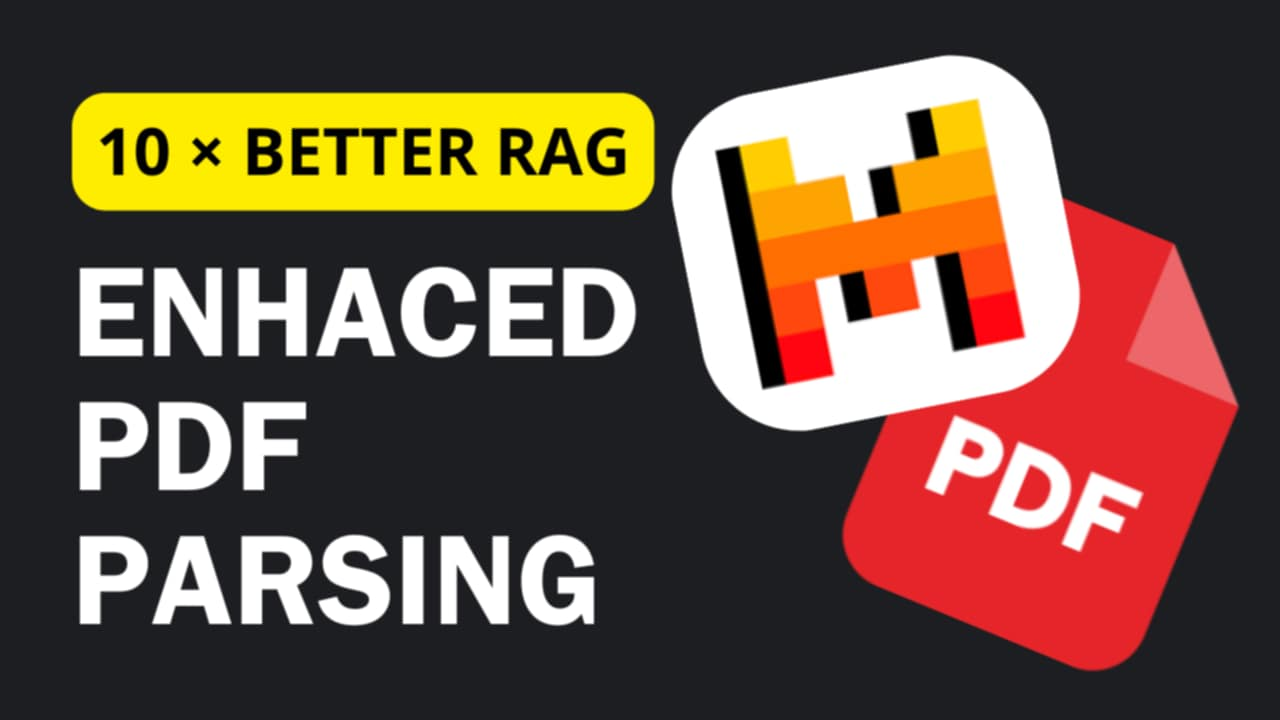

In [ ]:
!pip install mistralai

In [14]:
import os
from pathlib import Path
from mistralai import Mistral
from IPython.core.display import display, Markdown
from google.colab import userdata

In [15]:
api_key = userdata.get('Mistral_OCR')
client = Mistral(api_key=api_key)

## PDF Parsing

In [16]:
pdf_path="/content/دولة فلسطين - ويكيبيديا.pdf"
uploaded_pdf = client.files.upload(
    file={
        "file_name": pdf_path,
        "content": open(pdf_path, "rb"),
    },
    purpose="ocr"
)

In [17]:
client.files.retrieve(file_id=uploaded_pdf.id)

RetrieveFileOut(id='0ba434cb-1dbe-4f5f-8b5f-9eed5643a80d', object='file', size_bytes=407069, created_at=1741440304, filename='دولة فلسطين - ويكيبيديا.pdf', purpose='ocr', sample_type='ocr_input', source='upload', deleted=False, num_lines=None)

In [18]:
signed_url = client.files.get_signed_url(file_id=uploaded_pdf.id)

In [19]:
ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": signed_url.url,
    },
    include_image_base64=True
)

OCRResponse(pages=[OCRPageObject(index=0, markdown='# دونـة قنسطين \n\nهذه المقالة عن كيانات سياسية سائقة في فلسطين أو كيانات سياسية تُنادي جهات مختلفة بها، أو تتسمى بها كيانات سياسية غير مستقلة حاليا. لمنطقة فلسطين الواقعة جنوب الساحل الشرقي للبحر المتوسط، طالع فلسطين. لسلطة الحكم الذاتي الفلسطيني في مناطق من الضفة الغربية وقطاع غزة، طالع السلطة الوطنية الفلسطينية. لاستخدامات أخرى، طالع فلسطين (توضيح).\n![img-0.jpeg](img-0.jpeg)\n"الأرض الفلسطينية المحتلة عام 1967" التي وافقت منظمة التحرير الفلسطينية أن تكون حدود إعلان دولة\nفلسطينية [أ]\nالأراضي التي ضَحَّتها إسرائيل تحت مسمى القدس الشرقية واللطرون (بالأحضر فاتح)\n"الأرض والسكان\nإحداثيات\n\n## فلسطين (رسميًا: دَوْلَةُ فَلْسْطِين) [￼] هي بحكم القانون دولة ذات سيادة[27][28] في غرب آسيا، وتحكمها رسميًا منظمة التحرير الفلسطينية وتطالب بالضفة الغربية وقطاع غزة. ومع ذلك، احتلت إسرائيل الأراضي الفلسطينية منذ حرب 1967[29] وتنقسم الضفة الغربية حاليًا إلى 165 "كانتون" فلسطيني تحت الحكم المدني الجزئي للسلطة الوطنية الفلسطينية، و230 مستوطنة إسر
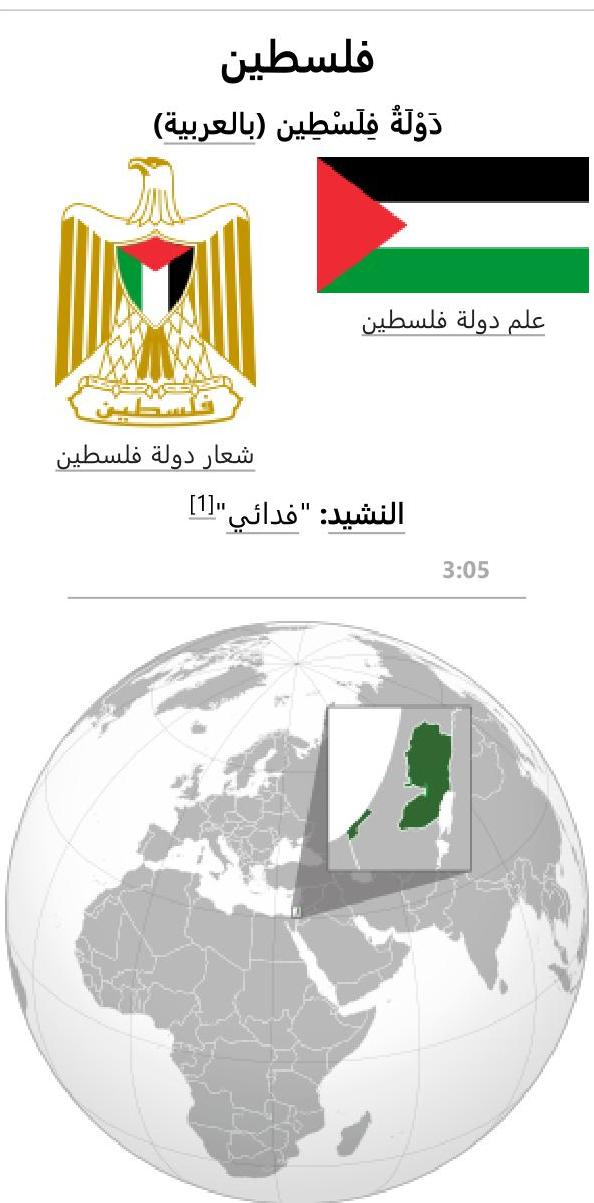

In [20]:
ocr_response

In [10]:
ocr_response.model

'mistral-ocr-2503-completion'

In [11]:
ocr_response.usage_info

OCRUsageInfo(pages_processed=2, doc_size_bytes=407069)

[OCRPageObject(index=0, markdown='# دونـة قنسطين \n\nهذه المقالة عن كيانات سياسية سائقة في فلسطين أو كيانات سياسية تُنادي جهات مختلفة بها، أو تتسمى بها كيانات سياسية غير مستقلة حاليا. لمنطقة فلسطين الواقعة جنوب الساحل الشرقي للبحر المتوسط، طالع فلسطين. لسلطة الحكم الذاتي الفلسطيني في مناطق من الضفة الغربية وقطاع غزة، طالع السلطة الوطنية الفلسطينية. لاستخدامات أخرى، طالع فلسطين (توضيح).\n![img-0.jpeg](img-0.jpeg)\n"الأرض الفلسطينية المحتلة عام 1967" التي وافقت منظمة التحرير الفلسطينية أن تكون حدود إعلان دولة\nفلسطينية [أ]\nالأراضي التي ضَحَّتها إسرائيل تحت مسمى القدس الشرقية واللطرون (بالأحضر فاتح)\n"الأرض والسكان\nإحداثيات\n\n## فلسطين (رسميًا: دَوْلَةُ فَلْسْطِين) [￼] هي بحكم القانون دولة ذات سيادة[27][28] في غرب آسيا، وتحكمها رسميًا منظمة التحرير الفلسطينية وتطالب بالضفة الغربية وقطاع غزة. ومع ذلك، احتلت إسرائيل الأراضي الفلسطينية منذ حرب 1967[29] وتنقسم الضفة الغربية حاليًا إلى 165 "كانتون" فلسطيني تحت الحكم المدني الجزئي للسلطة الوطنية الفلسطينية، و230 مستوطنة إسرائيلية تحت القانون
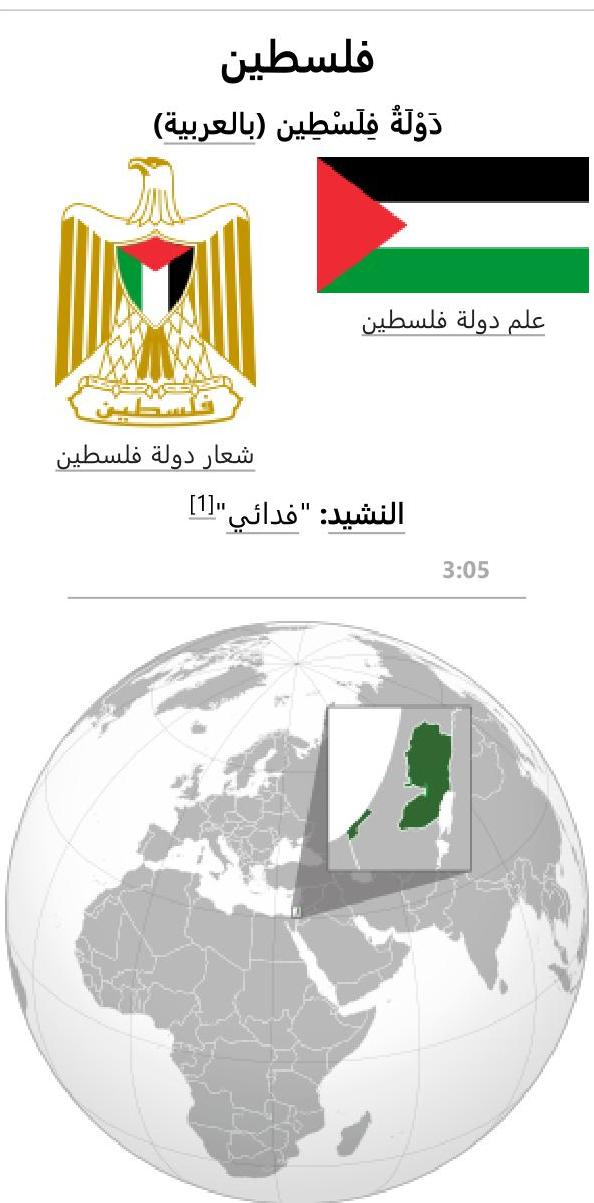

In [12]:
ocr_response.pages

OCRPageObject(index=0, markdown='# دونـة قنسطين \n\nهذه المقالة عن كيانات سياسية سائقة في فلسطين أو كيانات سياسية تُنادي جهات مختلفة بها، أو تتسمى بها كيانات سياسية غير مستقلة حاليا. لمنطقة فلسطين الواقعة جنوب الساحل الشرقي للبحر المتوسط، طالع فلسطين. لسلطة الحكم الذاتي الفلسطيني في مناطق من الضفة الغربية وقطاع غزة، طالع السلطة الوطنية الفلسطينية. لاستخدامات أخرى، طالع فلسطين (توضيح).\n![img-0.jpeg](img-0.jpeg)\n"الأرض الفلسطينية المحتلة عام 1967" التي وافقت منظمة التحرير الفلسطينية أن تكون حدود إعلان دولة\nفلسطينية [أ]\nالأراضي التي ضَحَّتها إسرائيل تحت مسمى القدس الشرقية واللطرون (بالأحضر فاتح)\n"الأرض والسكان\nإحداثيات\n\n## فلسطين (رسميًا: دَوْلَةُ فَلْسْطِين) [￼] هي بحكم القانون دولة ذات سيادة[27][28] في غرب آسيا، وتحكمها رسميًا منظمة التحرير الفلسطينية وتطالب بالضفة الغربية وقطاع غزة. ومع ذلك، احتلت إسرائيل الأراضي الفلسطينية منذ حرب 1967[29] وتنقسم الضفة الغربية حاليًا إلى 165 "كانتون" فلسطيني تحت الحكم المدني الجزئي للسلطة الوطنية الفلسطينية، و230 مستوطنة إسرائيلية تحت القانون 
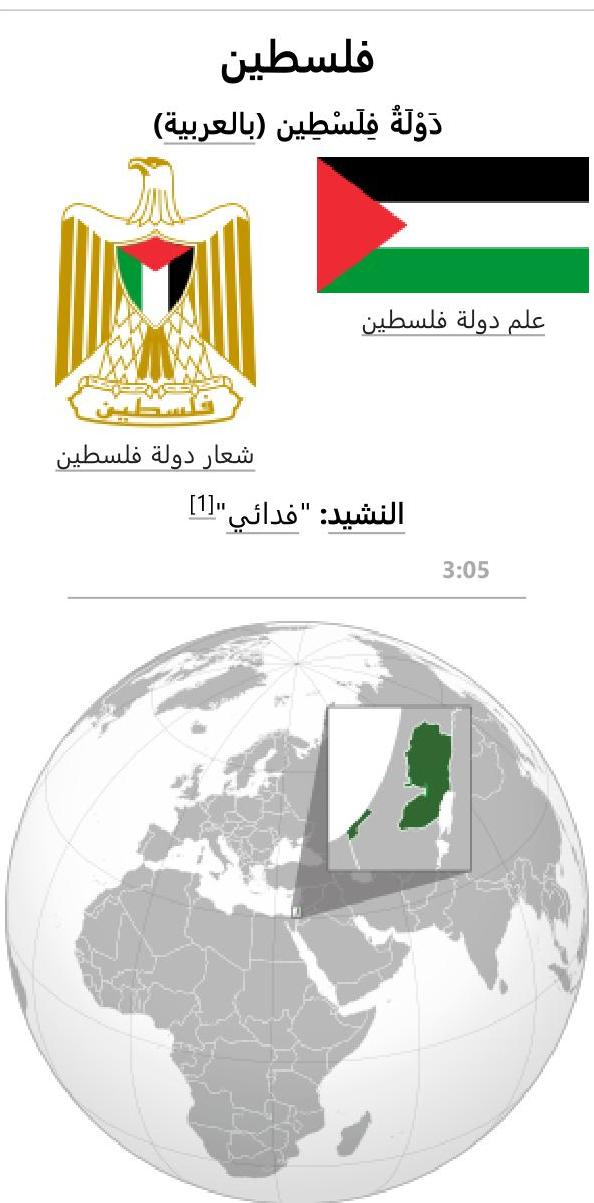

In [13]:
ocr_response.pages[0]

In [14]:
ocr_response.pages[0].markdown

'# دونـة قنسطين \n\nهذه المقالة عن كيانات سياسية سائقة في فلسطين أو كيانات سياسية تُنادي جهات مختلفة بها، أو تتسمى بها كيانات سياسية غير مستقلة حاليا. لمنطقة فلسطين الواقعة جنوب الساحل الشرقي للبحر المتوسط، طالع فلسطين. لسلطة الحكم الذاتي الفلسطيني في مناطق من الضفة الغربية وقطاع غزة، طالع السلطة الوطنية الفلسطينية. لاستخدامات أخرى، طالع فلسطين (توضيح).\n![img-0.jpeg](img-0.jpeg)\n"الأرض الفلسطينية المحتلة عام 1967" التي وافقت منظمة التحرير الفلسطينية أن تكون حدود إعلان دولة\nفلسطينية [أ]\nالأراضي التي ضَحَّتها إسرائيل تحت مسمى القدس الشرقية واللطرون (بالأحضر فاتح)\n"الأرض والسكان\nإحداثيات\n\n## فلسطين (رسميًا: دَوْلَةُ فَلْسْطِين) [￼] هي بحكم القانون دولة ذات سيادة[27][28] في غرب آسيا، وتحكمها رسميًا منظمة التحرير الفلسطينية وتطالب بالضفة الغربية وقطاع غزة. ومع ذلك، احتلت إسرائيل الأراضي الفلسطينية منذ حرب 1967[29] وتنقسم الضفة الغربية حاليًا إلى 165 "كانتون" فلسطيني تحت الحكم المدني الجزئي للسلطة الوطنية الفلسطينية، و230 مستوطنة إسرائيلية تحت القانون الإسرائيلي في مستوطنات الضفة الغ

[OCRImageObject(id='img-0.jpeg', top_left_x=103, top_left_y=495, bottom_right_x=697, bottom_right_y=1698, image_base64='')]
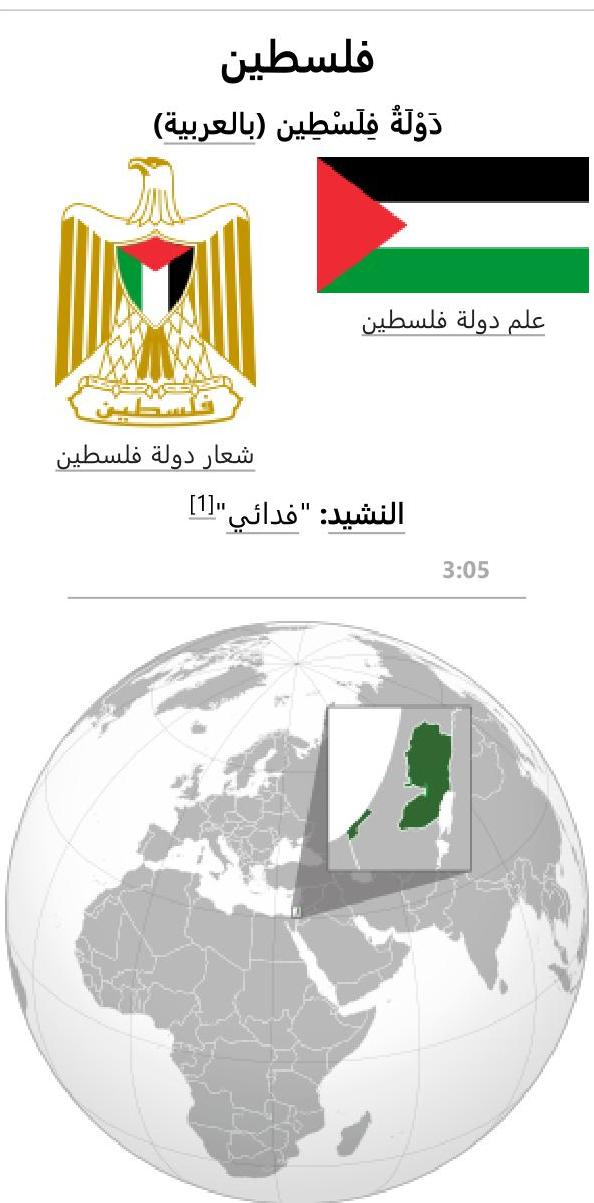

In [15]:
ocr_response.pages[0].images

In [21]:
import base64

# Initialize an empty dictionary to store the image ID and its base64 value
image_base64_dict = {}

# Loop through each page in the OCR response
for i in range(len(ocr_response.pages)):
    for image_obj in ocr_response.pages[i].images:
        image_id = image_obj.id  # Get the image ID (e.g., 'img-0.jpeg')

        # Extract base64 string (remove the 'data:image/...;base64,' prefix)
        base64_data = image_obj.image_base64.split(",")[-1]

        # Add the image ID and base64 string to the dictionary
        image_base64_dict[image_id] = f'b-{base64_data}'

        # Decode the base64 string
        image_bytes = base64.b64decode(base64_data)

        # Save the image with its ID as the filename
        with open(image_id, "wb") as image_file:
            image_file.write(image_bytes)

        print(f"Saved: {image_id}")

Saved: img-0.jpeg


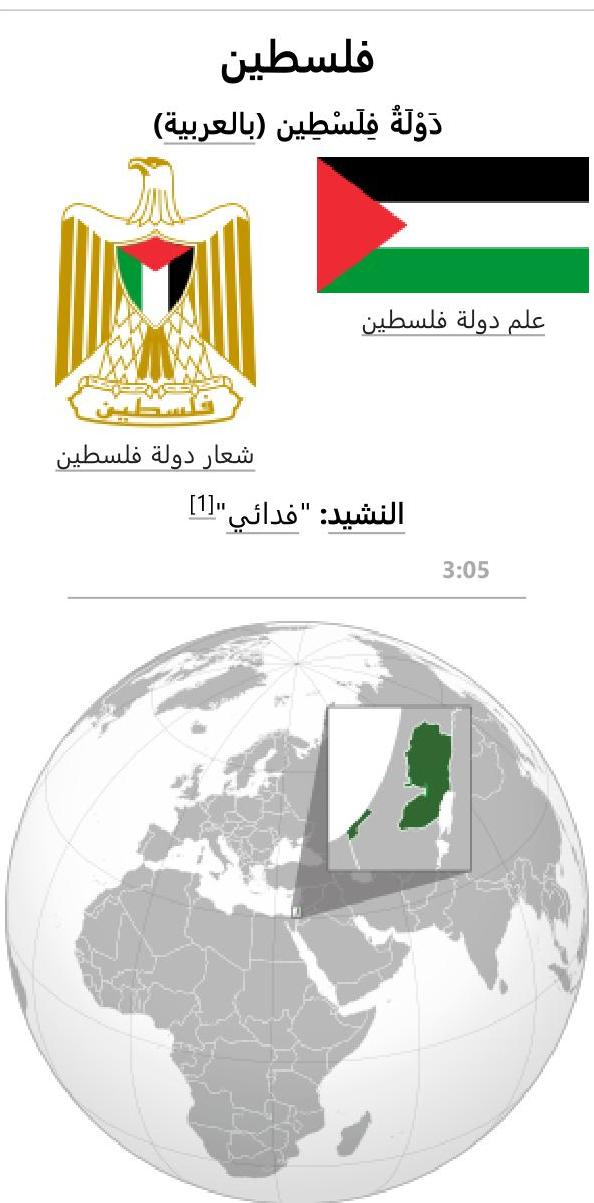

In [22]:
from IPython.display import Image
Image('/content/img-0.jpeg')


# دونـة قنسطين 

هذه المقالة عن كيانات سياسية سائقة في فلسطين أو كيانات سياسية تُنادي جهات مختلفة بها، أو تتسمى بها كيانات سياسية غير مستقلة حاليا. لمنطقة فلسطين الواقعة جنوب الساحل الشرقي للبحر المتوسط، طالع فلسطين. لسلطة الحكم الذاتي الفلسطيني في مناطق من الضفة الغربية وقطاع غزة، طالع السلطة الوطنية الفلسطينية. لاستخدامات أخرى، طالع فلسطين (توضيح).
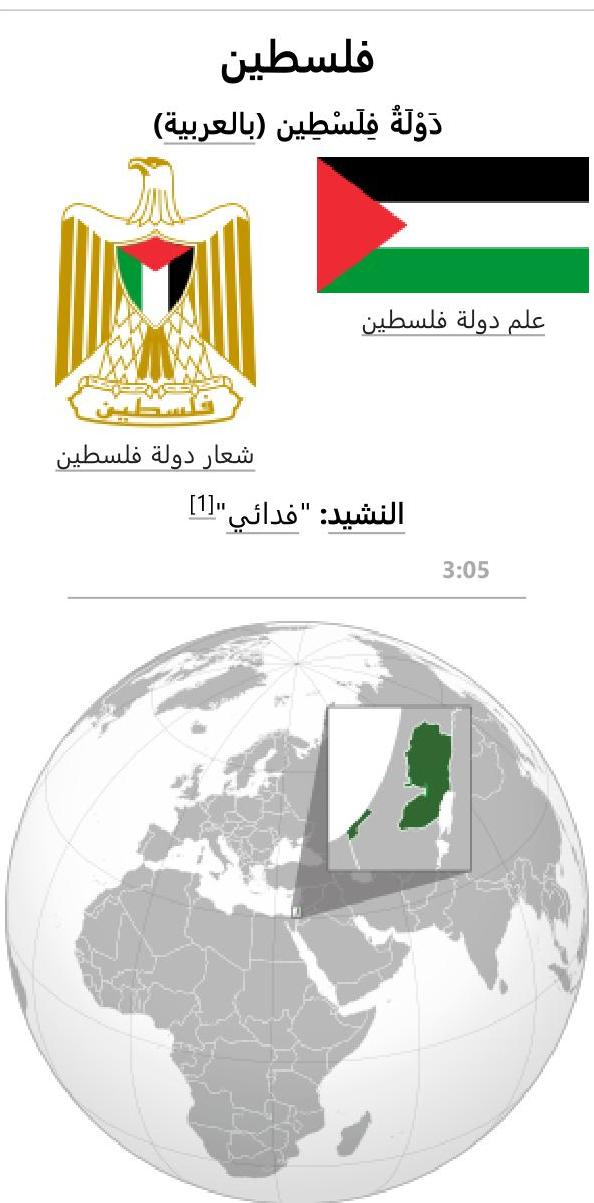
"الأرض الفلسطينية المحتلة عام 1967" التي وافقت منظمة التحرير الفلسطينية أن تكون حدود إعلان دولة
فلسطينية [أ]
الأراضي التي ضَحَّتها إسرائيل تحت مسمى القدس الشرقية واللطرون (بالأحضر فاتح)
"الأرض والسكان
إحداثيات

## فلسطين (رسميًا: دَوْلَةُ فَلْسْطِين) [￼] هي بحكم القانون دولة ذات سيادة[27][28] في غرب آسيا، وتحكمها رسميًا منظمة التحرير الفلسطينية وتطالب بالضفة الغربية وقطاع غزة. ومع ذلك، احتلت إسرائيل الأراضي الفلسطينية منذ حرب 1967[29] وتنقسم الضفة الغربية حاليًا إلى 165 "كانتون" فلسطيني تحت الحكم المدني الجزئي للسلطة الوطنية الفلسطينية، و230 مستوطنة إسرائيلية تحت القانون الإسرائيلي في مستوطنات الضفة الغربية، في حين أن غزة تحكمها حركة حماس وتحت حصار طويل الأمد من قبل إسرائيل. [￼]

بعد الحرب العالمية الثانية، في عام 1947، تبنت الأمم المتحدة خطة التقسيم لفلسطين الانتدابية حيث أوصت بإنشاء دولتين مستقلتين عربية ويهودية وكيان القدس المستقل.[37] وافق اليهود على خطة التقسيم ورفضها العرب. مباشرة بعد تبني الجمعية العامة للقرار، اندلعت حرب أهلية[38] ولم تنفذ الخطة.[39] في اليوم التالي لتأسيس دولة إسرائيل في 14 مايو 1948،[40][41][42] غزت الجيوش العربية المجاورة الانتداب البريطاني السابق وقاتلت القوات الإسرائيلية.[43][44] في وقت لاحق، أنشئت حكومة عموم فلسطين من قبل جامعة الدول العربية في 22 سبتمبر 1948 لحكم الأراضي الخاضعة للسيطرة المصرية في غزة. وسرعان ما اعترف بها جميع أعضاء جامعة الدول العربية باستثناء شرق الأردن، الذي ضم الضفة الغربية. على الرغم من إعلان ولاية حكومة عموم فلسطين لتشمل كامل فلسطين الانتدابية السابقة، إلا أن ولايتها الفعلية اقتصرت على قطاع غزة.[45] استولت إسرائيل في وقت لاحق على قطاع غزة وشبه جزيرة سيناء من مصر، والضفة الغربية (بما في ذلك القدس الشرقية) من الأردن، ومرتفعات الجولان من سوريا في يونيو 1967 خلال حرب 1967.

في 15 نوفمبر 1988 في الجزائر العاصمة، أعلن ياسر عرفات، رئيس منظمة التحرير الفلسطينية، إنشاء دولة فلسطين. بعد عام من توقيع اتفاقيات أوسلو في عام 1993، شكلت السلطة الوطنية الفلسطينية لإدارة (بدرجات متفاوتة) المناطق أ وب في الضفة الغربية، التي تضم 165 «كانتون»، وقطاع غزة. بعد أن أصبحت حماس الحزب الرائد في برلمان السلطة الوطنية الفلسطينية في الانتخابات الأخيرة (2006)، اندلع صراع بينها وبين حركة فتح، مما أدى إلى سيطرة حماس على غزة في عام 2007 (بعد عامين من فك الارتباط الإسرائيلي).

يبلغ عدد سكان فلسطين 5،051،953 نسمة اعتبارًا من فبراير 2020، واحتلت المرتبة 121 في العالم.[46] على الرغم من أن فلسطين تدعي أن القدس عاصمة لها، إلا أن المدينة تخضع لسيطرة إسرائيل. لا يعترف المجتمع الدولي بمطالب فلسطين وإسرائيل بالمدينة. اعترف بدولة فلسطين من قبل 138 من أصل 193 عضوًا في

| الاسم | المساحة (كم^{2})^{[94]} | السكان | الكثافة السكانية (لكل كم^{2}) | عاصمة المحافظة |
| **جنين** | 583 | 311,231 | 533.8 | جنين |
| **طوباس** | 402 | 64,719 | 161.0 | طوباس |
| **طولكرم** | 246 | 182,053 | 740.0 | طولكرم |
| **نابلس** | 605 | 380,961 | 629.7 | نابلس |
| **قلقيلية** | 166 | 110,800 | 667.5 | قلقيلية |
| **سلفيت** | 204 | 70,727 | 346.7 | سلفيت |
| **رام الله والبيرة** | 855 | 348,110 | 407.1 | رام الله |
| **أريحا والأغوار** | 593 | 52,154 | 87.9 | أريحا |
| **القدس** | 345 | 419,108^{a} | 1214.8^{a} | القدس (حكم القانون) |
| **بيت لحم** | 659 | 216,114 | 927.9 | بيت لحم |
| **الخليل** | 997 | 706,508 | 708.6 | الخليل |
| **شمال غزة** | 61 | 362,772 | 5947.1 | جباليا |
| **غزة** | 74 | 625,824 | 8457.1 | غزة |
| **دير البلج** | 58 | 264,455 | 4559.6 | دير البلج |
| **خان يونس** | 108 | 341,393 | 3161.0 | خان يونس |
| **رفح** | 64 | 225,538 | 3524.0 | رفح |

a. تشمل البيانات الواردة من القدس، القدس الشرقية المحتلة وسكانها الإسرائيليون.

قسمت محافظات الضفة الغربية إلى ثلاث مناطق وفقًا لاتفاقية أوسلو 2. تشكل المنطقة (أ) 18% من الضفة الغربية حسب المنطقة، وتديرها الحكومة الفلسطينية.ا^{[95]}^{[96]} تشكل المنطقة (ب) 22% من الضفة الغربية، وتخضع للسيطرة المدنية الفلسطينية، والسيطرة الأمنية الإسرائيلية الفلسطينية المشتركة.ا^{[97]}^{[98]} تشكل المنطقة (ج)، باستثناء القدس الشرقية، 60% من الضفة الغربية، وتديرها الإدارة المدنية الإسرائيلية، باستثناء أن الحكومة الفلسطينية توفر الخدمات التعليمية والطبية لـ150.000 فلسطيني في المنطقة.ا^{[95]} أكثر من 99% من المنطقة (ج) محظورة على الفلسطينيين.ا^{[97]} هناك حوالي 330 ألف إسرائيلي يعيشون في مستوطنات بالمنطقة (ج).ا^{[98]} رغم أن المنطقة (ج) تخضع للأحكام العرفية، فإن الإسرائيليين الذين يعيشون هناك يحاكمون أمام محاكم مدنية إسرائيلية.ا^{[99]}

تدار القدس الشرقية (التي تضم بلدية القدس الشرقية الأردنية الصغيرة قبل عام 1967 جنبًا إلى جنب مع منطقة كبيرة من الضفة الغربية قبل عام 1967 والتي حددتها إسرائيل في عام 1967) كجزء من منطقة القدس في إسرائيل ولكن تطالب بها فلسطين كجزء من محافظة القدس. ضمت فعليًا من قبل إسرائيل في عام 1967، من خلال تطبيق القانون الإسرائيلي والولاية القضائية والإدارة بموجب قانون 1948 المعدل لهذا الغرض، وأعيد تأكيد هذا الضم المزعوم دستوريًا (ضمنيًا) في القانون الأساسي: القدس 1980،ا^{[95]} لكن هذا الضم لم يتم التصديق عليه من قبل أي دولة أخرى.ا^{[100]} في عام 2010 من أصل 456000 نسمة في القدس الشرقية، كان 60% منهم فلسطينيون و40% إسرائيليون.ا^{[101]}^{[102]} ومع ذلك، منذ أواخر العقد الأول من القرن الحادي والعشرين، أعاد الجدار الأمني الإسرائيلي في الضفة الغربية فعليًا ضم عشرات الآلاف من الفلسطينيين الذين يحملون بطاقات هوية إسرائيلية إلى الضفة الغربية، تاركًا القدس الشرقية داخل الجدار بأغلبية إسرائيلية صغيرة.ا^{[بحاجة لمصدر]}

## العلاقات الخارجية

طالع أيضًا: علاقات فلسطين الخارجية وقائمة البعثات الدبلوماسية الفلسطينية وقائمة البعثات الدبلوماسية في فلسطين

In [23]:
import re
from IPython.display import display, Markdown

# Assuming ocr_response is the API response
def replace_images_in_markdown_for_all_pages(ocr_response):
    for i in range(len(ocr_response.pages)):
        markdown = ocr_response.pages[i].markdown
        images = ocr_response.pages[i].images

        # Create a dictionary mapping image ids to base64 data for the current page
        image_base64_dict = {image.id: image.image_base64 for image in images}

        # Function to replace image references with base64 data in Markdown
        def replace(match):
            img_id = match.group(1)
            base64_data = image_base64_dict.get(img_id)
            if base64_data:
                return f'![{img_id}]({base64_data})'
            return match.group(0)

        # Replace all image references in the current page's markdown
        updated_markdown = re.sub(r'!\[(.*?)\]\((.*?)\)', replace, markdown)

        # Display the updated Markdown for the current page
        display(Markdown(updated_markdown))

# Example usage:
replace_images_in_markdown_for_all_pages(ocr_response)


## Improve PDF parsing with Image summarization

In [24]:
def image_summarization(client, base64_image):
  # Specify model
  model = "pixtral-12b-2409"
  # Initialize the Mistral client
  client = Mistral(api_key=api_key)
  prompt = """Analyze the content of the image and provide a detailed summary. Include descriptions of any visible text, objects, diagrams, graphs, or charts.
              the summary should be in the same langage as the original image.
              the sammary should be a text.
  """
  # Define the messages for the chat
  messages = [
      {
          "role": "user",
          "content": [
              {
                  "type": "text",
                  "text": prompt
              },
              {
                  "type": "image_url",
                  "image_url": f"data:image/jpeg;base64,{base64_image}"
              }
          ]
      }
  ]

  # Get the chat response
  chat_response = client.chat.complete(
      model=model,
      messages=messages,
      max_tokens=1000,
      temperature=0.2
  )

  return("image summary: ", chat_response.choices[0].message.content)

In [36]:
def clean_base64(base64_str):
    # Check if the base64 string contains the prefix and remove it if it does
    if base64_str.startswith('data:image/jpeg;base64,'):
        return base64_str.replace('data:image/jpeg;base64,', '')
    return base64_str

# Function to replace image references with the summary of the image in Markdown
def replace_images_with_summary_in_markdown(ocr_response, client):
    updated_markdown_list = []

    for i in range(len(ocr_response.pages)):
        markdown = ocr_response.pages[i].markdown
        images = ocr_response.pages[i].images

        # Create a dictionary mapping image ids to base64 data for the current page
        image_base64_dict = {image.id: image.image_base64 for image in images}

        # Function to replace image references with the summary of the image in Markdown
        def replace(match):
            img_id = match.group(1)
            base64_data = image_base64_dict.get(img_id)

            if base64_data:
                # Clean the base64 string by removing the repeated prefix
                cleaned_base64 = clean_base64(base64_data)
                image_summary = image_summarization(client, cleaned_base64)
                return f'[Image Summary: {img_id}] - {image_summary}'

            return match.group(0)

        # Replace all image references in the current page's markdown with summaries
        updated_markdown = re.sub(r'!\[(.*?)\]\((.*?)\)', replace, markdown)

        # Store the updated Markdown
        updated_markdown_list.append(updated_markdown)

        # Display the updated Markdown for the current page
        display(Markdown(updated_markdown))

    # Combine all pages into a single Markdown string
    final_markdown = "\n\n".join(updated_markdown_list)
    return final_markdown


In [37]:
final_markdown = replace_images_with_summary_in_markdown(ocr_response, client)

# دونـة قنسطين 

هذه المقالة عن كيانات سياسية سائقة في فلسطين أو كيانات سياسية تُنادي جهات مختلفة بها، أو تتسمى بها كيانات سياسية غير مستقلة حاليا. لمنطقة فلسطين الواقعة جنوب الساحل الشرقي للبحر المتوسط، طالع فلسطين. لسلطة الحكم الذاتي الفلسطيني في مناطق من الضفة الغربية وقطاع غزة، طالع السلطة الوطنية الفلسطينية. لاستخدامات أخرى، طالع فلسطين (توضيح).
[Image Summary: img-0.jpeg] - ('image summary: ', 'في الصورة، يتم عرض شعار دولة فلسطين بشكل بارز في الزاوية العلوية اليسرى. الشعار هو درع ذهبي، مزين بلمسات حمراء وذهبية. في مركز الدرع، يوجد علم فلسطين، الذي يتكون من ثلاثة ألوان مميزة: الأحمر، والأبيض، والأخضر.\n\nبجانب الشعار، في الزاوية العلوية اليمنى، يتم عرض علم فلسطين. العلم هو تظليل من الألوان الحمراء، والبيضاء، والأخضر، مرتبة في ثلاثة أشرطة أفقية.\n\nفي الزاوية السفلية اليمنى من الصورة، يتم عرض خريطة العالم. الخريطة باللونين الأسود والأبيض، مع تسليط الضوء على دولة فلسطين باللون الأخضر.\n\nيحتوي الجزء العلوي من الصورة على نص باللغة العربية يقرأ "دولة فلسطين" و"الجمهورية العربية الفلسطينية". في الزاوية السفلية اليمنى، هناك نص آخر يقرأ "3:05".\n\nفي المجمل، الصورة هي تمثيل بصري لدولة فلسطين، بما في ذلك الشعارها، العلم، والخريطة.')
"الأرض الفلسطينية المحتلة عام 1967" التي وافقت منظمة التحرير الفلسطينية أن تكون حدود إعلان دولة
فلسطينية [أ]
الأراضي التي ضَحَّتها إسرائيل تحت مسمى القدس الشرقية واللطرون (بالأحضر فاتح)
"الأرض والسكان
إحداثيات

## فلسطين (رسميًا: دَوْلَةُ فَلْسْطِين) [￼] هي بحكم القانون دولة ذات سيادة[27][28] في غرب آسيا، وتحكمها رسميًا منظمة التحرير الفلسطينية وتطالب بالضفة الغربية وقطاع غزة. ومع ذلك، احتلت إسرائيل الأراضي الفلسطينية منذ حرب 1967[29] وتنقسم الضفة الغربية حاليًا إلى 165 "كانتون" فلسطيني تحت الحكم المدني الجزئي للسلطة الوطنية الفلسطينية، و230 مستوطنة إسرائيلية تحت القانون الإسرائيلي في مستوطنات الضفة الغربية، في حين أن غزة تحكمها حركة حماس وتحت حصار طويل الأمد من قبل إسرائيل. [￼]

بعد الحرب العالمية الثانية، في عام 1947، تبنت الأمم المتحدة خطة التقسيم لفلسطين الانتدابية حيث أوصت بإنشاء دولتين مستقلتين عربية ويهودية وكيان القدس المستقل.[37] وافق اليهود على خطة التقسيم ورفضها العرب. مباشرة بعد تبني الجمعية العامة للقرار، اندلعت حرب أهلية[38] ولم تنفذ الخطة.[39] في اليوم التالي لتأسيس دولة إسرائيل في 14 مايو 1948،[40][41][42] غزت الجيوش العربية المجاورة الانتداب البريطاني السابق وقاتلت القوات الإسرائيلية.[43][44] في وقت لاحق، أنشئت حكومة عموم فلسطين من قبل جامعة الدول العربية في 22 سبتمبر 1948 لحكم الأراضي الخاضعة للسيطرة المصرية في غزة. وسرعان ما اعترف بها جميع أعضاء جامعة الدول العربية باستثناء شرق الأردن، الذي ضم الضفة الغربية. على الرغم من إعلان ولاية حكومة عموم فلسطين لتشمل كامل فلسطين الانتدابية السابقة، إلا أن ولايتها الفعلية اقتصرت على قطاع غزة.[45] استولت إسرائيل في وقت لاحق على قطاع غزة وشبه جزيرة سيناء من مصر، والضفة الغربية (بما في ذلك القدس الشرقية) من الأردن، ومرتفعات الجولان من سوريا في يونيو 1967 خلال حرب 1967.

في 15 نوفمبر 1988 في الجزائر العاصمة، أعلن ياسر عرفات، رئيس منظمة التحرير الفلسطينية، إنشاء دولة فلسطين. بعد عام من توقيع اتفاقيات أوسلو في عام 1993، شكلت السلطة الوطنية الفلسطينية لإدارة (بدرجات متفاوتة) المناطق أ وب في الضفة الغربية، التي تضم 165 «كانتون»، وقطاع غزة. بعد أن أصبحت حماس الحزب الرائد في برلمان السلطة الوطنية الفلسطينية في الانتخابات الأخيرة (2006)، اندلع صراع بينها وبين حركة فتح، مما أدى إلى سيطرة حماس على غزة في عام 2007 (بعد عامين من فك الارتباط الإسرائيلي).

يبلغ عدد سكان فلسطين 5،051،953 نسمة اعتبارًا من فبراير 2020، واحتلت المرتبة 121 في العالم.[46] على الرغم من أن فلسطين تدعي أن القدس عاصمة لها، إلا أن المدينة تخضع لسيطرة إسرائيل. لا يعترف المجتمع الدولي بمطالب فلسطين وإسرائيل بالمدينة. اعترف بدولة فلسطين من قبل 138 من أصل 193 عضوًا في

| الاسم | المساحة (كم^{2})^{[94]} | السكان | الكثافة السكانية (لكل كم^{2}) | عاصمة المحافظة |
| **جنين** | 583 | 311,231 | 533.8 | جنين |
| **طوباس** | 402 | 64,719 | 161.0 | طوباس |
| **طولكرم** | 246 | 182,053 | 740.0 | طولكرم |
| **نابلس** | 605 | 380,961 | 629.7 | نابلس |
| **قلقيلية** | 166 | 110,800 | 667.5 | قلقيلية |
| **سلفيت** | 204 | 70,727 | 346.7 | سلفيت |
| **رام الله والبيرة** | 855 | 348,110 | 407.1 | رام الله |
| **أريحا والأغوار** | 593 | 52,154 | 87.9 | أريحا |
| **القدس** | 345 | 419,108^{a} | 1214.8^{a} | القدس (حكم القانون) |
| **بيت لحم** | 659 | 216,114 | 927.9 | بيت لحم |
| **الخليل** | 997 | 706,508 | 708.6 | الخليل |
| **شمال غزة** | 61 | 362,772 | 5947.1 | جباليا |
| **غزة** | 74 | 625,824 | 8457.1 | غزة |
| **دير البلج** | 58 | 264,455 | 4559.6 | دير البلج |
| **خان يونس** | 108 | 341,393 | 3161.0 | خان يونس |
| **رفح** | 64 | 225,538 | 3524.0 | رفح |

a. تشمل البيانات الواردة من القدس، القدس الشرقية المحتلة وسكانها الإسرائيليون.

قسمت محافظات الضفة الغربية إلى ثلاث مناطق وفقًا لاتفاقية أوسلو 2. تشكل المنطقة (أ) 18% من الضفة الغربية حسب المنطقة، وتديرها الحكومة الفلسطينية.ا^{[95]}^{[96]} تشكل المنطقة (ب) 22% من الضفة الغربية، وتخضع للسيطرة المدنية الفلسطينية، والسيطرة الأمنية الإسرائيلية الفلسطينية المشتركة.ا^{[97]}^{[98]} تشكل المنطقة (ج)، باستثناء القدس الشرقية، 60% من الضفة الغربية، وتديرها الإدارة المدنية الإسرائيلية، باستثناء أن الحكومة الفلسطينية توفر الخدمات التعليمية والطبية لـ150.000 فلسطيني في المنطقة.ا^{[95]} أكثر من 99% من المنطقة (ج) محظورة على الفلسطينيين.ا^{[97]} هناك حوالي 330 ألف إسرائيلي يعيشون في مستوطنات بالمنطقة (ج).ا^{[98]} رغم أن المنطقة (ج) تخضع للأحكام العرفية، فإن الإسرائيليين الذين يعيشون هناك يحاكمون أمام محاكم مدنية إسرائيلية.ا^{[99]}

تدار القدس الشرقية (التي تضم بلدية القدس الشرقية الأردنية الصغيرة قبل عام 1967 جنبًا إلى جنب مع منطقة كبيرة من الضفة الغربية قبل عام 1967 والتي حددتها إسرائيل في عام 1967) كجزء من منطقة القدس في إسرائيل ولكن تطالب بها فلسطين كجزء من محافظة القدس. ضمت فعليًا من قبل إسرائيل في عام 1967، من خلال تطبيق القانون الإسرائيلي والولاية القضائية والإدارة بموجب قانون 1948 المعدل لهذا الغرض، وأعيد تأكيد هذا الضم المزعوم دستوريًا (ضمنيًا) في القانون الأساسي: القدس 1980،ا^{[95]} لكن هذا الضم لم يتم التصديق عليه من قبل أي دولة أخرى.ا^{[100]} في عام 2010 من أصل 456000 نسمة في القدس الشرقية، كان 60% منهم فلسطينيون و40% إسرائيليون.ا^{[101]}^{[102]} ومع ذلك، منذ أواخر العقد الأول من القرن الحادي والعشرين، أعاد الجدار الأمني الإسرائيلي في الضفة الغربية فعليًا ضم عشرات الآلاف من الفلسطينيين الذين يحملون بطاقات هوية إسرائيلية إلى الضفة الغربية، تاركًا القدس الشرقية داخل الجدار بأغلبية إسرائيلية صغيرة.ا^{[بحاجة لمصدر]}

## العلاقات الخارجية

طالع أيضًا: علاقات فلسطين الخارجية وقائمة البعثات الدبلوماسية الفلسطينية وقائمة البعثات الدبلوماسية في فلسطين

## RAG PIPELINE

In [ ]:
%pip install -qU pypdf langchain_community
%pip install -qU langchain-mistralai
%pip install langchain_chroma langchain_openai

In [96]:
from langchain_community.document_loaders import PyPDFLoader

file_path = "/content/دولة فلسطين - ويكيبيديا.pdf"
loader = PyPDFLoader(file_path)

docs = loader.load()

print(len(docs))

2


In [97]:
from langchain_mistralai import ChatMistralAI
import getpass
import os

os.environ["MISTRAL_API_KEY"] = getpass.getpass()

llm = ChatMistralAI(model="mistral-large-latest")

··········


In [98]:
from langchain_chroma import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from sentence_transformers import SentenceTransformer

# Initialize text splitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=200, chunk_overlap=20)

# Split the documents
splits = text_splitter.split_documents(docs)

# Initialize embedding model from Hugging Face
embedding_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# Use HuggingFaceEmbeddings to embed documents
pdf_vectorstore = Chroma.from_documents(
    documents=splits,
    embedding=HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
)

# Create retriever
retriever = pdf_vectorstore.as_retriever()


In [99]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate

system_prompt = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know."
    "\n\n"
    "{context}"
)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)


question_answer_chain = create_stuff_documents_chain(llm, prompt)
rag_chain = create_retrieval_chain(retriever, question_answer_chain)

results = rag_chain.invoke({"input": "ما هو اسم النشيد الفلسطيني؟"})

results

{'input': 'ما هو اسم النشيد الفلسطيني؟',
 'context': [Document(id='50a71830-0a22-48dd-95c7-cf4d40638dae', metadata={}, page_content='من فك الارتباط الإسرائيلي).'),
  Document(id='9f31c937-0e55-4636-ba9e-bfaa659dd15d', metadata={}, page_content='من فك الارتباط الإسرائيلي).'),
  Document(id='e19dc019-3e9b-446a-a274-f9f74007550f', metadata={}, page_content='على الرغم من أن فلسطين تدعي أن القدس عاصمة لها، إلا أن المدينة تخضع لسيطرة إسرائيل. لا يعترف'),
  Document(id='9d321297-c7c3-4cab-b092-96ed527db511', metadata={}, page_content='على الرغم من أن فلسطين تدعي أن القدس عاصمة لها، إلا أن المدينة تخضع لسيطرة إسرائيل. لا يعترف')],
 'answer': 'لا أعرف الإجابة على هذا السؤال بناءً على السياق المقدم.'}

In [90]:
# Query
# ما هو اسم النشيد الفلسطيني؟
#ما هو الحيوان الموجود في شعار فلسطين؟

### RAG on the parsed Markdown

In [100]:
from langchain_chroma import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from sentence_transformers import SentenceTransformer
from langchain.docstore.document import Document

# Split and chunk parsed markdown
text_splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=10)
chunks = text_splitter.split_text(final_markdown) # we use the markdown variable as input

# Convert string chunks into LangChain Document objects
documents = [Document(page_content=chunk) for chunk in chunks]

# Initialize embedding model from Hugging Face
embedding_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# Use HuggingFaceEmbeddings to embed documents
markdown_vectorstore = Chroma.from_documents(
    documents=documents,
    embedding=HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
)

# Create retriever
retriever = markdown_vectorstore.as_retriever()

In [102]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate

system_prompt = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know."
    "\n\n"
    "{context}"
)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)


question_answer_chain = create_stuff_documents_chain(llm, prompt)
rag_chain = create_retrieval_chain(retriever, question_answer_chain)

results = rag_chain.invoke({"input": "ما هو اسم النشيد الفلسطيني؟"})

results

{'input': 'ما هو اسم النشيد الفلسطيني؟',
 'context': [Document(id='50a71830-0a22-48dd-95c7-cf4d40638dae', metadata={}, page_content='من فك الارتباط الإسرائيلي).'),
  Document(id='9f31c937-0e55-4636-ba9e-bfaa659dd15d', metadata={}, page_content='من فك الارتباط الإسرائيلي).'),
  Document(id='977328f4-eb64-4d27-a883-9769f43a9ceb', metadata={}, page_content='من فك الارتباط الإسرائيلي).'),
  Document(id='9d321297-c7c3-4cab-b092-96ed527db511', metadata={}, page_content='على الرغم من أن فلسطين تدعي أن القدس عاصمة لها، إلا أن المدينة تخضع لسيطرة إسرائيل. لا يعترف')],
 'answer': 'اسم النشيد الوطني الفلسطيني هو "فدائي".'}

## Image Parsing

In [ ]:
import base64
import requests
import os
from mistralai import Mistral

def encode_image(image_path):
    """Encode the image to base64."""
    try:
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')
    except FileNotFoundError:
        print(f"Error: The file {image_path} was not found.")
        return None
    except Exception as e:  # Added general exception handling
        print(f"Error: {e}")
        return None

# Path to your image
image_path = "/content/1ca47151-6f04-4072-a09c-423eee6de181_jpg.rf.9dc0ede240bbe9a7d83b8d3d6a8daeb7.jpg"

# Getting the base64 string
base64_image = encode_image(image_path)

client = Mistral(api_key=api_key)

ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{base64_image}"
    },
    include_image_base64=True
)

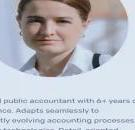

- Certified public accountant with 6+ years of experience. Adapts seamlessly to constantly evolving accounting processes and new technologies. Detail-oriented, efficient and organized, with extensive experience in accounting systems.

■ Ilinveks@email.com

- 12 Main Street, Washington, DC 20229
- (212) 555-1212
- Jun 231995
- American
- linkadin.com/ibrooks

SEILLS

- Organizational skills
- Time management
- Adaptability
- Leadership

LANGUAGE

- English | Native
- Spanish | Advanced
- German | Elementary

CONTINUED

- Feb 2018
Present

- Jan 2013

Feb 2018

- Jan 2013

Jan 2013

- Feb 2018

- Feb 2012

Jan 2013

## ACCOUNTING DIRECTOR

- Apex Corporation, Washington DC
- Reported to and collaborated with the Chief Financial Officer (CFO) to evaluate and evolve organizations best practices and implement effective financial and accounting strategies.
- Dverseeing the accounting team and providing guidance and direction as needed.

STAFF ACCOUNTANT
Dobra Corporation, Washington DC

- Prepared financial statements and monthly/quarterly reports for review by the senior accountant and upperlevel management. Ensured the accuracy and timely delivery of all reports.
- Managing relationships with external auditors, tax professionals, and other financial service providers.

- ACCOUNTANT

Unix Corporation, Washington DC

- Trained, hired and mentored bookkeepers ensuring adherence to sound accounting practices.
- Managing the budgeting and forecasting process.

EDUCATION

- Jul 2009

Dec 2009

- Jul 2008

Dec 2008

- Jul 2007

Jun 2008

- Jul 2007

Jun 2008

ADVANCED FINANCIAL ACCOUNTING Georgetown University, Washington DC

- Advanced principles and concepts of financial accounting

ADVANCED FINANCIAL ACCOUNTING Georgetown University, Washington DC

- Principles and practices of auditing, including the role of the auditor, the audit process, and the detection and prevention of fraud

MANADERIAL ACCOUNTING
American University, Washington DC

- Accounting information for internal decision-making and planning

In [ ]:
replace_images_in_markdown_for_all_pages(ocr_response)